# What is the most optimal skill to learn for Data Analysts?

## Methodology

1. Group skills to determine median salary and likelyhood of being in job postings
2. Visualise median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [17]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [18]:
df_DA_PT = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Portugal')].copy()


In [19]:
df_DA_PT = df_DA_PT.dropna(subset=['salary_year_avg'])

df_DA_PT_exploded = df_DA_PT.explode('job_skills')

df_DA_PT_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1555,111175.0,databricks
1555,111175.0,spark
67571,111175.0,sql
67571,111175.0,bigquery
67571,111175.0,looker


In [20]:
df_DA_skills = df_DA_PT_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_PT)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,15,111175.0,40.540541
python,13,89204.0,35.135135
excel,8,76875.0,21.621622
tableau,8,111175.0,21.621622
looker,7,111175.0,18.918919
r,5,111175.0,13.513514
power bi,5,89100.0,13.513514
spark,4,100137.5,10.810811
go,3,53014.0,8.108108


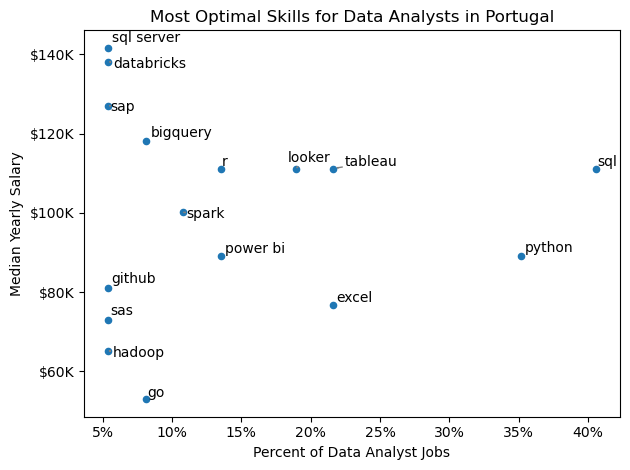

In [21]:
from adjustText import adjust_text
from matplotlib.patches import ArrowStyle
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FuncFormatter

df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

texts = []

for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))
ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in Portugal')
plt.tight_layout()

plt.show()

In [23]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['microstrategy',
  'msaccess',
  'dax',
  'esquisse',
  'cognos',
  'qlik',
  'looker',
  'powerpoint',
  'excel',
  'tableau',
  'nuix',
  'sap',
  'powerbi',
  'spss',
  'splunk',
  'datarobot',
  'word',
  'ms access',
  'alteryx',
  'sharepoint',
  'ssrs',
  'ssis',
  'visio',
  'power bi',
  'sheets',
  'outlook',
  'spreadsheet',
  'sas'],
 'programming': ['perl',
  'clojure',
  'pascal',
  'elixir',
  'c++',
  'solidity',
  'apl',
  'c',
  'typescript',
  'visualbasic',
  'html',
  'no-sql',
  'julia',
  'rust',
  'fortran',
  'sql',
  'sass',
  'ocaml',
  'nosql',
  'dart',
  'swift',
  'groovy',
  'crystal',
  'golang',
  'f#',
  'assembly',
  'php',
  'visual basic',
  'java',
  'vb.net',
  'go',
  'lua',
  't-sql',
  'bash',
  'powershell',
  'scala',
  'shell',
  'matlab',
  'vba',
  'cobol',
  'haskell',
  'kotlin',
  'objective-c',
  'c#',
  'lisp',
  'erlang',
  'mongodb',
  'css',
  'delphi',
  'javascript',
  'r',
  'mongo',
  'ruby',
  'sas',
  'pyt

In [28]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,microstrategy
0,analyst_tools,msaccess
0,analyst_tools,dax
0,analyst_tools,esquisse
0,analyst_tools,cognos
...,...,...
9,sync,zoom
9,sync,unify
9,sync,symphony
9,sync,mattermost


In [30]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

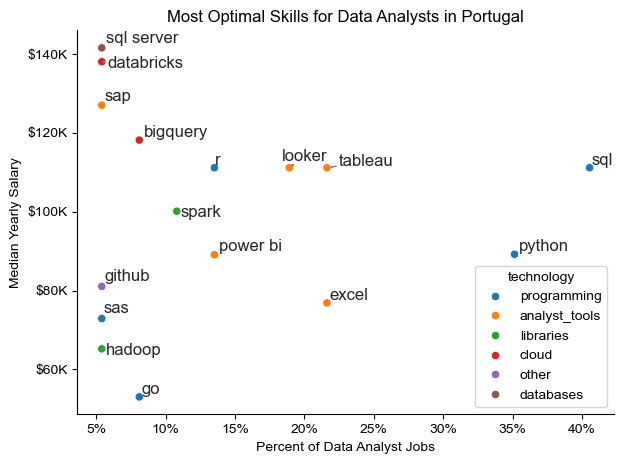

In [34]:
from adjustText import adjust_text
from matplotlib.patches import ArrowStyle
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FuncFormatter

#df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

texts = []

for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))
ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in Portugal')
plt.tight_layout()

plt.show()